    Author:Jarron Baldwin
    Date:  12.1.2022
    Description: Using deep learning to predict whether housing price is below or above median value.
    
    Forked from josephlee94 from github

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.4843 - val_loss: 0.6547 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.5010 - val_loss: 0.6475 - val_accuracy: 0.5662
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.5548 - val_loss: 0.6415 - val_accuracy: 0.6575
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.6614 - val_loss: 0.6358 - val_accuracy: 0.6849
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6908 - val_loss: 0.6303 - val_accuracy: 0.7215
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7250 - val_loss: 0.6248 - val_accuracy: 0.7306
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.7466 - val_loss: 0.6193 - val_accuracy: 0.7443
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8767 - val_loss: 0.3789 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8757 - val_loss: 0.3773 - val_accuracy: 0.8356
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8767 - val_loss: 0.3755 - val_accuracy: 0.8402
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8767 - val_loss: 0.3770 - val_accuracy: 0.8311
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8806 - val_loss: 0.3714 - val_accuracy: 0.8402
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8787 - val_loss: 0.3702 - val_accuracy: 0.8402
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8845 - val_loss: 0.3696 - val_accuracy: 0.8447
Epoch 

In [18]:
model.evaluate(X_test, Y_test)[1]


7/7 [==============================] - 0s 751us/step - loss: 0.2793 - accuracy: 0.8995


0.8995434045791626

In [19]:
import matplotlib.pyplot as plt

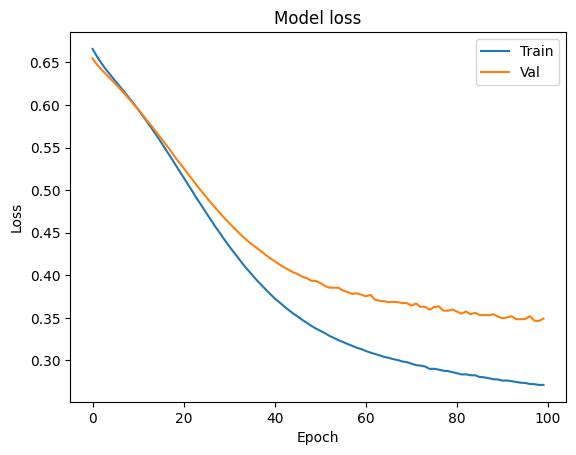

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

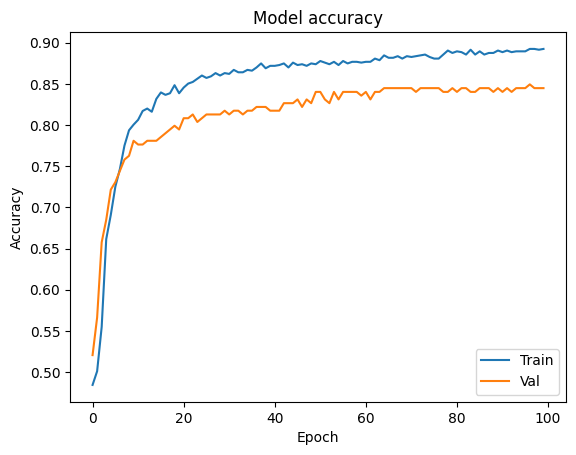

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4665 - accuracy: 0.7994 - val_loss: 0.4163 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3450 - accuracy: 0.8542 - val_loss: 0.3712 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2961 - accuracy: 0.8738 - val_loss: 0.3439 - val_accuracy: 0.8265
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2708 - accuracy: 0.8865 - val_loss: 0.3353 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2686 - accuracy: 0.8924 - val_loss: 0.3222 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2507 - accuracy: 0.8963 - val_loss: 0.3123 - val_accuracy: 0.8356
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2222 - accuracy: 0.9090 - val_loss: 0.3357 - val_accuracy: 0.8311
Epoch 

32/32 [==============================] - 1s 17ms/step - loss: 0.1353 - accuracy: 0.9403 - val_loss: 0.3354 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1310 - accuracy: 0.9452 - val_loss: 0.3240 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1413 - accuracy: 0.9423 - val_loss: 0.2977 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1834 - accuracy: 0.9276 - val_loss: 0.3316 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1511 - accuracy: 0.9325 - val_loss: 0.3134 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1465 - accuracy: 0.9266 - val_loss: 0.3153 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1317 - accuracy: 0.9432 - val_loss: 0.3330 - val_accuracy: 0.8630
Epoch 65/100

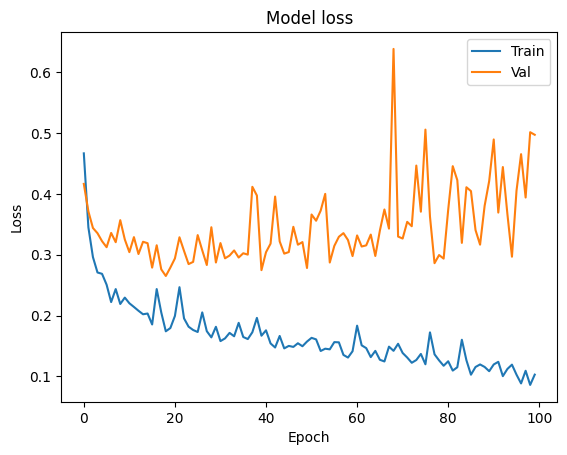

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

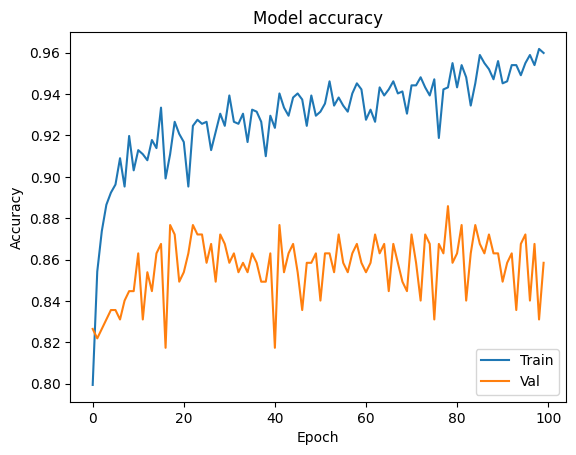

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [30]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 25ms/step - loss: 14.2365 - accuracy: 0.6204 - val_loss: 3.9140 - val_accuracy: 0.8082
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 1.6573 - accuracy: 0.8346 - val_loss: 0.7220 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5584 - accuracy: 0.8689 - val_loss: 0.5499 - val_accuracy: 0.8311
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5184 - accuracy: 0.8630 - val_loss: 0.5697 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4835 - accuracy: 0.8767 - val_loss: 0.5655 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.5055 - accuracy: 0.8620 - val_loss: 0.5273 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4840 - accuracy: 0.8640 - val_loss: 0.5149 - val_accuracy: 0.8402
Epoch

32/32 [==============================] - 1s 21ms/step - loss: 0.4217 - accuracy: 0.8943 - val_loss: 0.4820 - val_accuracy: 0.8402
Epoch 59/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4122 - accuracy: 0.8963 - val_loss: 0.4836 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4267 - accuracy: 0.8894 - val_loss: 0.4949 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4311 - accuracy: 0.8767 - val_loss: 0.4831 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4292 - accuracy: 0.8875 - val_loss: 0.4821 - val_accuracy: 0.8356
Epoch 63/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4177 - accuracy: 0.8933 - val_loss: 0.4804 - val_accuracy: 0.8356
Epoch 64/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4235 - accuracy: 0.8924 - val_loss: 0.4819 - val_accuracy: 0.8447
Epoch 65/100

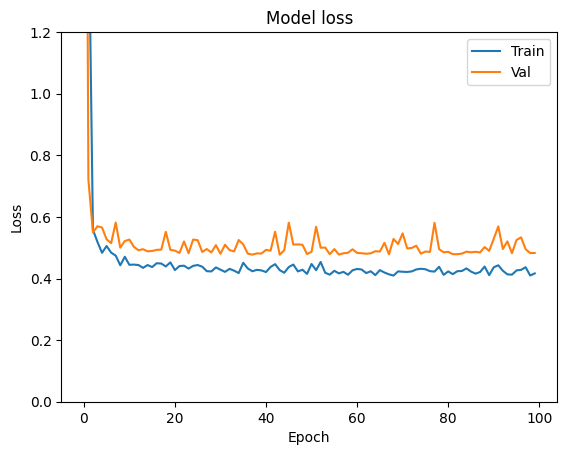

In [31]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

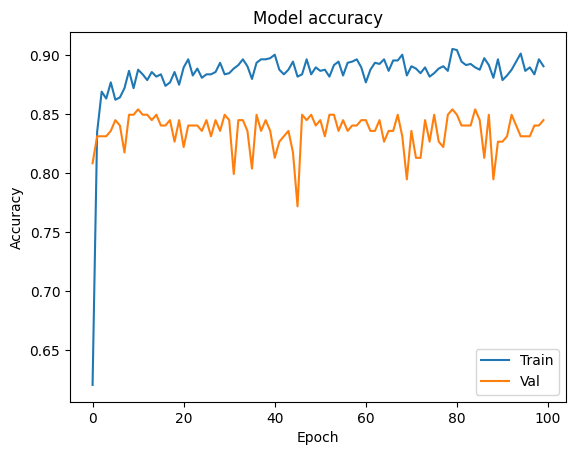

In [32]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
